# 1. Decision Tree  

## 1.1. Ý tưởng

Decision Tree (cây quyết định) là một thuật toán học máy được sử dụng phổ biến trong các bài toán phân loại (Classification) và hồi quy (Regression). Nó hoạt động bằng cách chia dữ liệu thành các nhóm con dựa trên các thuộc tính của dữ liệu và sau đó đưa ra quyết định dựa trên các nhóm con này.

## 1.2. Cấu trúc của một Decision Tree

Một cây quyết định bao gồm
- **Nút gốc (Root Node)**: Nơi bắt đầu của cây, đại diện cho toàn bộ tập dữ liệu.
- **Nút quyết định (Decision Nodes)**: Nơi dữ liệu được chia thành các nhóm con dựa trên một thuộc tính.
- **Nút lá (Leaf Nodes)**: Nơi chứa nhãn phân loại cuối cùng sau khi dữ liệu đã được chia đủ nhỏ.

## 1.3. Xây dựng Decision Tree Classification bằng thuật toán Iterative Dichotomiser 3 (ID3).

### 1.3.1. Ý tưởng

- Trong ID3, chúng ta cần xác định thứ tự của các thuộc tính để xem xét tại mỗi bước. Với các bài toán phức tạp, việc tìm được giải pháp tối ưu thường không khả thi. Thay vào đó, một phương pháp đơn giản là chọn thuộc tính tốt nhất tại mỗi bước dựa trên một tiêu chuẩn cụ thể, thường được gọi là cách chọn **tham lam (greedy)**. Cách làm này giúp đơn giản hóa bài toán mặc dù không luôn tối ưu nhưng thường gần với cách làm tối ưu.
- Sau mỗi câu hỏi (thuộc tính), dữ liệu được phân chia vào các node con tương ứng với các giá trị của thuộc tính đó. Để đánh giá chất lượng của một phép phân chia, cần có một phép đo. Một phép phân chia tốt nhất khi dữ liệu trong mỗi node con hoàn toàn thuộc vào một class, tức node đó trở thành leaf node và không cần phân chia thêm. Nếu dữ liệu trong các node con vẫn lẫn lộn, phép phân chia đó chưa tốt.

### 1.3.2. Thuộc tính nào phân loại tốt nhất ?

- ID3 sử dụng khái niệm entropy và Information Gain để quyết định cách chia dữ liệu ở mỗi nút của cây. Các bước cơ bản của thuật toán ID3 bao gồm:
  1. Tính toán entropy cho tập dữ liệu ban đầu.
  2. Tính toán Information Gain cho mỗi thuộc tính.
  3. Chọn thuộc tính có Information Gain cao nhất để làm nút quyết định.
  4. Chia tập dữ liệu thành các tập con dựa trên giá trị của thuộc tính được chọn.
  5. Lặp lại quá trình trên cho từng tập con, sử dụng tập con và các thuộc tính còn lại để tiếp tục xây dựng cây.

- Entropy đo lường độ hỗn loạn hoặc không chắc chắn của một tập hợp dữ liệu
  
  Công thức tính Entropy cho một tập dữ liệu $S$:
    \begin{equation}
      H(S) = - \sum_{i=1}^{n}p_i\log(p_i)
    \end{equation}

    Với $n$ là số lớp phân loại

    $p_i$ là xác suất của lớp i trong tập dữ liệu $S$

  Hàm Entropy đạt giá trị nhỏ nhất (tinh khiết nhất) nếu có một giá trị $p_i = 1$, đạt giá trị lớn nhất (vẩn đục nhất) nếu tất cả các $p_i$ bằng nhau.

- Information Gain đo lường sự giảm bớt entropy khi chia dữ liệu theo một thuộc tính $A$

  Công thức tính Information Gain với tập dữ liệu $S$ và một phép chia dữ liệu theo thuộc tính $A$:

  \begin{equation}
      Gain(S,A) = Entropy(S) - \sum_{v \in Value(A)} \frac{|S_v|}{|S|} Entropy(S_v)
  \end{equation}

  Trong đó:
    - $S$ là tập dữ liệu ban đầu
    - $A$ là thuộc tính đang được sử dụng để phân chia dữ liệu
    - $S_v$ là tập con của S với giá trị $v$ của thuộc tính $A$
    - $Value(A)$ là tập hợp các giá trị có thể có của thuộc tính $A$

- Ví dụ về việc tính toán Entropy và Information Gain:


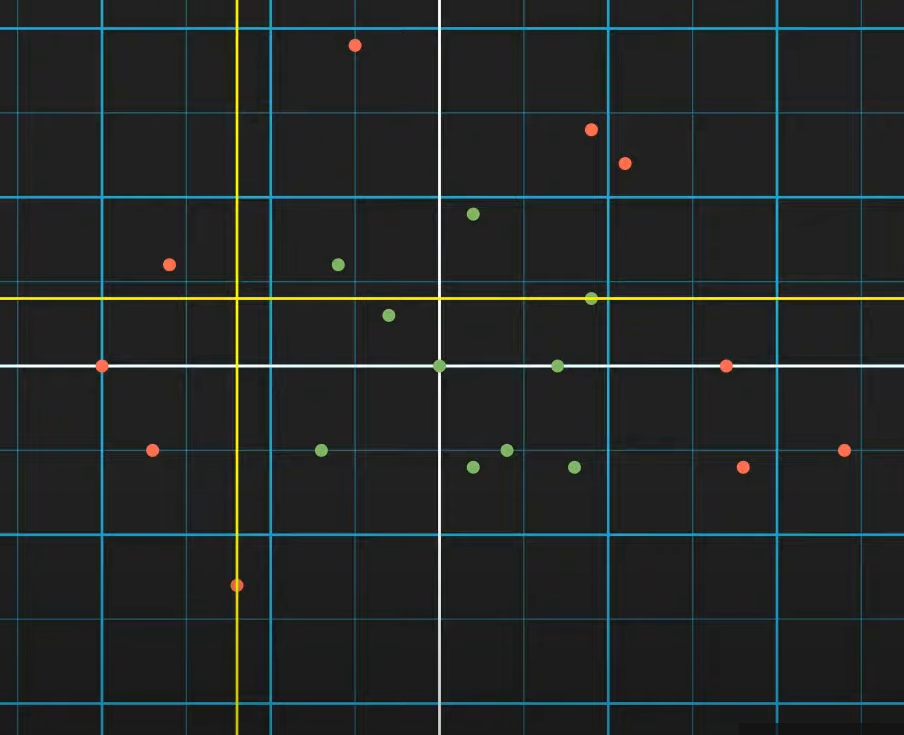

- Trên mặt phẳng tọa độ có tổng 20 điểm trong đó có 10 điểm xanh và 10 điểm đỏ, việc của ta là phân loại chúng.
- Xét 2 phép chia với thuộc tính là $X_1\leq4$ và $X_0\leq-12$ thì phép chia nào tốt hơn:

  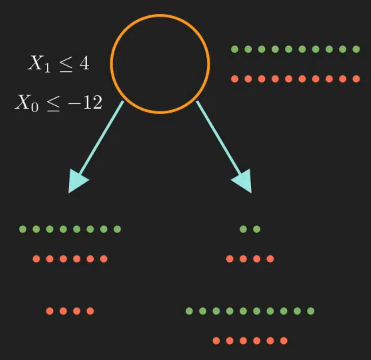

  - Tính toán Entropy
    - Tập dữ liệu ban đầu
      \begin{equation}
        H(S) = - \sum_{i=1}^{n}p_i\log(p_i) = -0.5log_2(0.5) - 0.5log_2(0.5) = 1
      \end{equation}

    - Với $X_1\leq4$:

      \begin{equation}
        H(S) = - \sum_{i=1}^{n}p_i\log(p_i) = -\frac{8}{14}log_2(\frac{8}{14}) - \frac{6}{14}log_2(\frac{6}{14}) = 0.99
      \end{equation}

      \begin{equation}
        H(S) = - \sum_{i=1}^{n}p_i\log(p_i) = -\frac{2}{6}log_2(\frac{2}{6}) - \frac{4}{6}log_2(\frac{4}{6}) = 0.91
      \end{equation}

    - Với $X_0\leq-12$:

        \begin{equation}
          H(S) = - \sum_{i=1}^{n}p_i\log(p_i) = -\frac{4}{4}log_2(\frac{4}{4}) - \frac{0}{4}log_2(\frac{0}{4}) = 0
        \end{equation}

        \begin{equation}
          H(S) = - \sum_{i=1}^{n}p_i\log(p_i) = -\frac{10}{16}log_2(\frac{10}{16}) - \frac{6}{16}log_2(\frac{6}{16}) = 0.95
        \end{equation}
    
  - Tính toán Information Gain:
    - Với $X_1\leq4$

      \begin{equation}
          IG_1 = 1 - \frac{14}{20} * 0.99 - \frac{6}{20} * 0.91 = 0.034
      \end{equation}

    - Với $X_0\leq-12$:

      \begin{equation}
          IG_2 = 1 - \frac{4}{20} * 0 - \frac{16}{20} * 0.95 = 0.24
      \end{equation}
  
  - Qua đây ta thấy $IG_2 > IG_1$ do đó sẽ chọn phép chia thuộc tính $X_0\leq-12$


- Trong các thuật toán decision tree như ID3, nếu tiếp tục phân chia các node chưa tinh khiết, ta sẽ thu được một cây mà mọi điểm trong tập huấn luyện đều được dự đoán đúng, dẫn đến cây rất phức tạp với nhiều node chỉ chứa một vài điểm dữ liệu, gây ra hiện tượng overfitting.

- Để tránh overfitting, có thể sử dụng các phương pháp sau để dừng phân chia node và coi nó là leaf node:

  1. **Entropy bằng 0**: Nếu node có entropy bằng 0, tức mọi điểm đều thuộc một class.
  2. **Số phần tử nhỏ hơn ngưỡng**: Nếu số phần tử trong node nhỏ hơn một ngưỡng nhất định, chấp nhận một số điểm bị phân lớp sai. Class của leaf node được xác định dựa trên class chiếm đa số trong node.
  3. **Độ sâu đạt ngưỡng**: Nếu khoảng cách từ node đến root node đạt tới một giá trị nào đó, hạn chế chiều sâu của cây để giảm độ phức tạp và tránh overfitting.
  4. **Số leaf node vượt ngưỡng**: Nếu tổng số leaf node vượt quá một ngưỡng nhất định.
  5. **Information gain nhỏ**: Nếu việc phân chia node không làm giảm entropy quá nhiều (information gain nhỏ hơn một ngưỡng nào đó).

# 2. Ví dụ minh họa

## 2.1. Import thư viện


In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

## 2.2. Chuẩn bị dữ liệu

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
diabetes = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/diabetes.csv")

In [16]:
print(f"Number of line: {diabetes.shape[0]}")

Number of line: 768


In [17]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = diabetes[feature_cols] # Features
y = diabetes.Outcome # Target variable

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## 2.3. Tạo Decision Tree Model

In [21]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc = dtc.fit(X_train,y_train)

## 2.4. Đánh giá

In [22]:
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7402597402597403


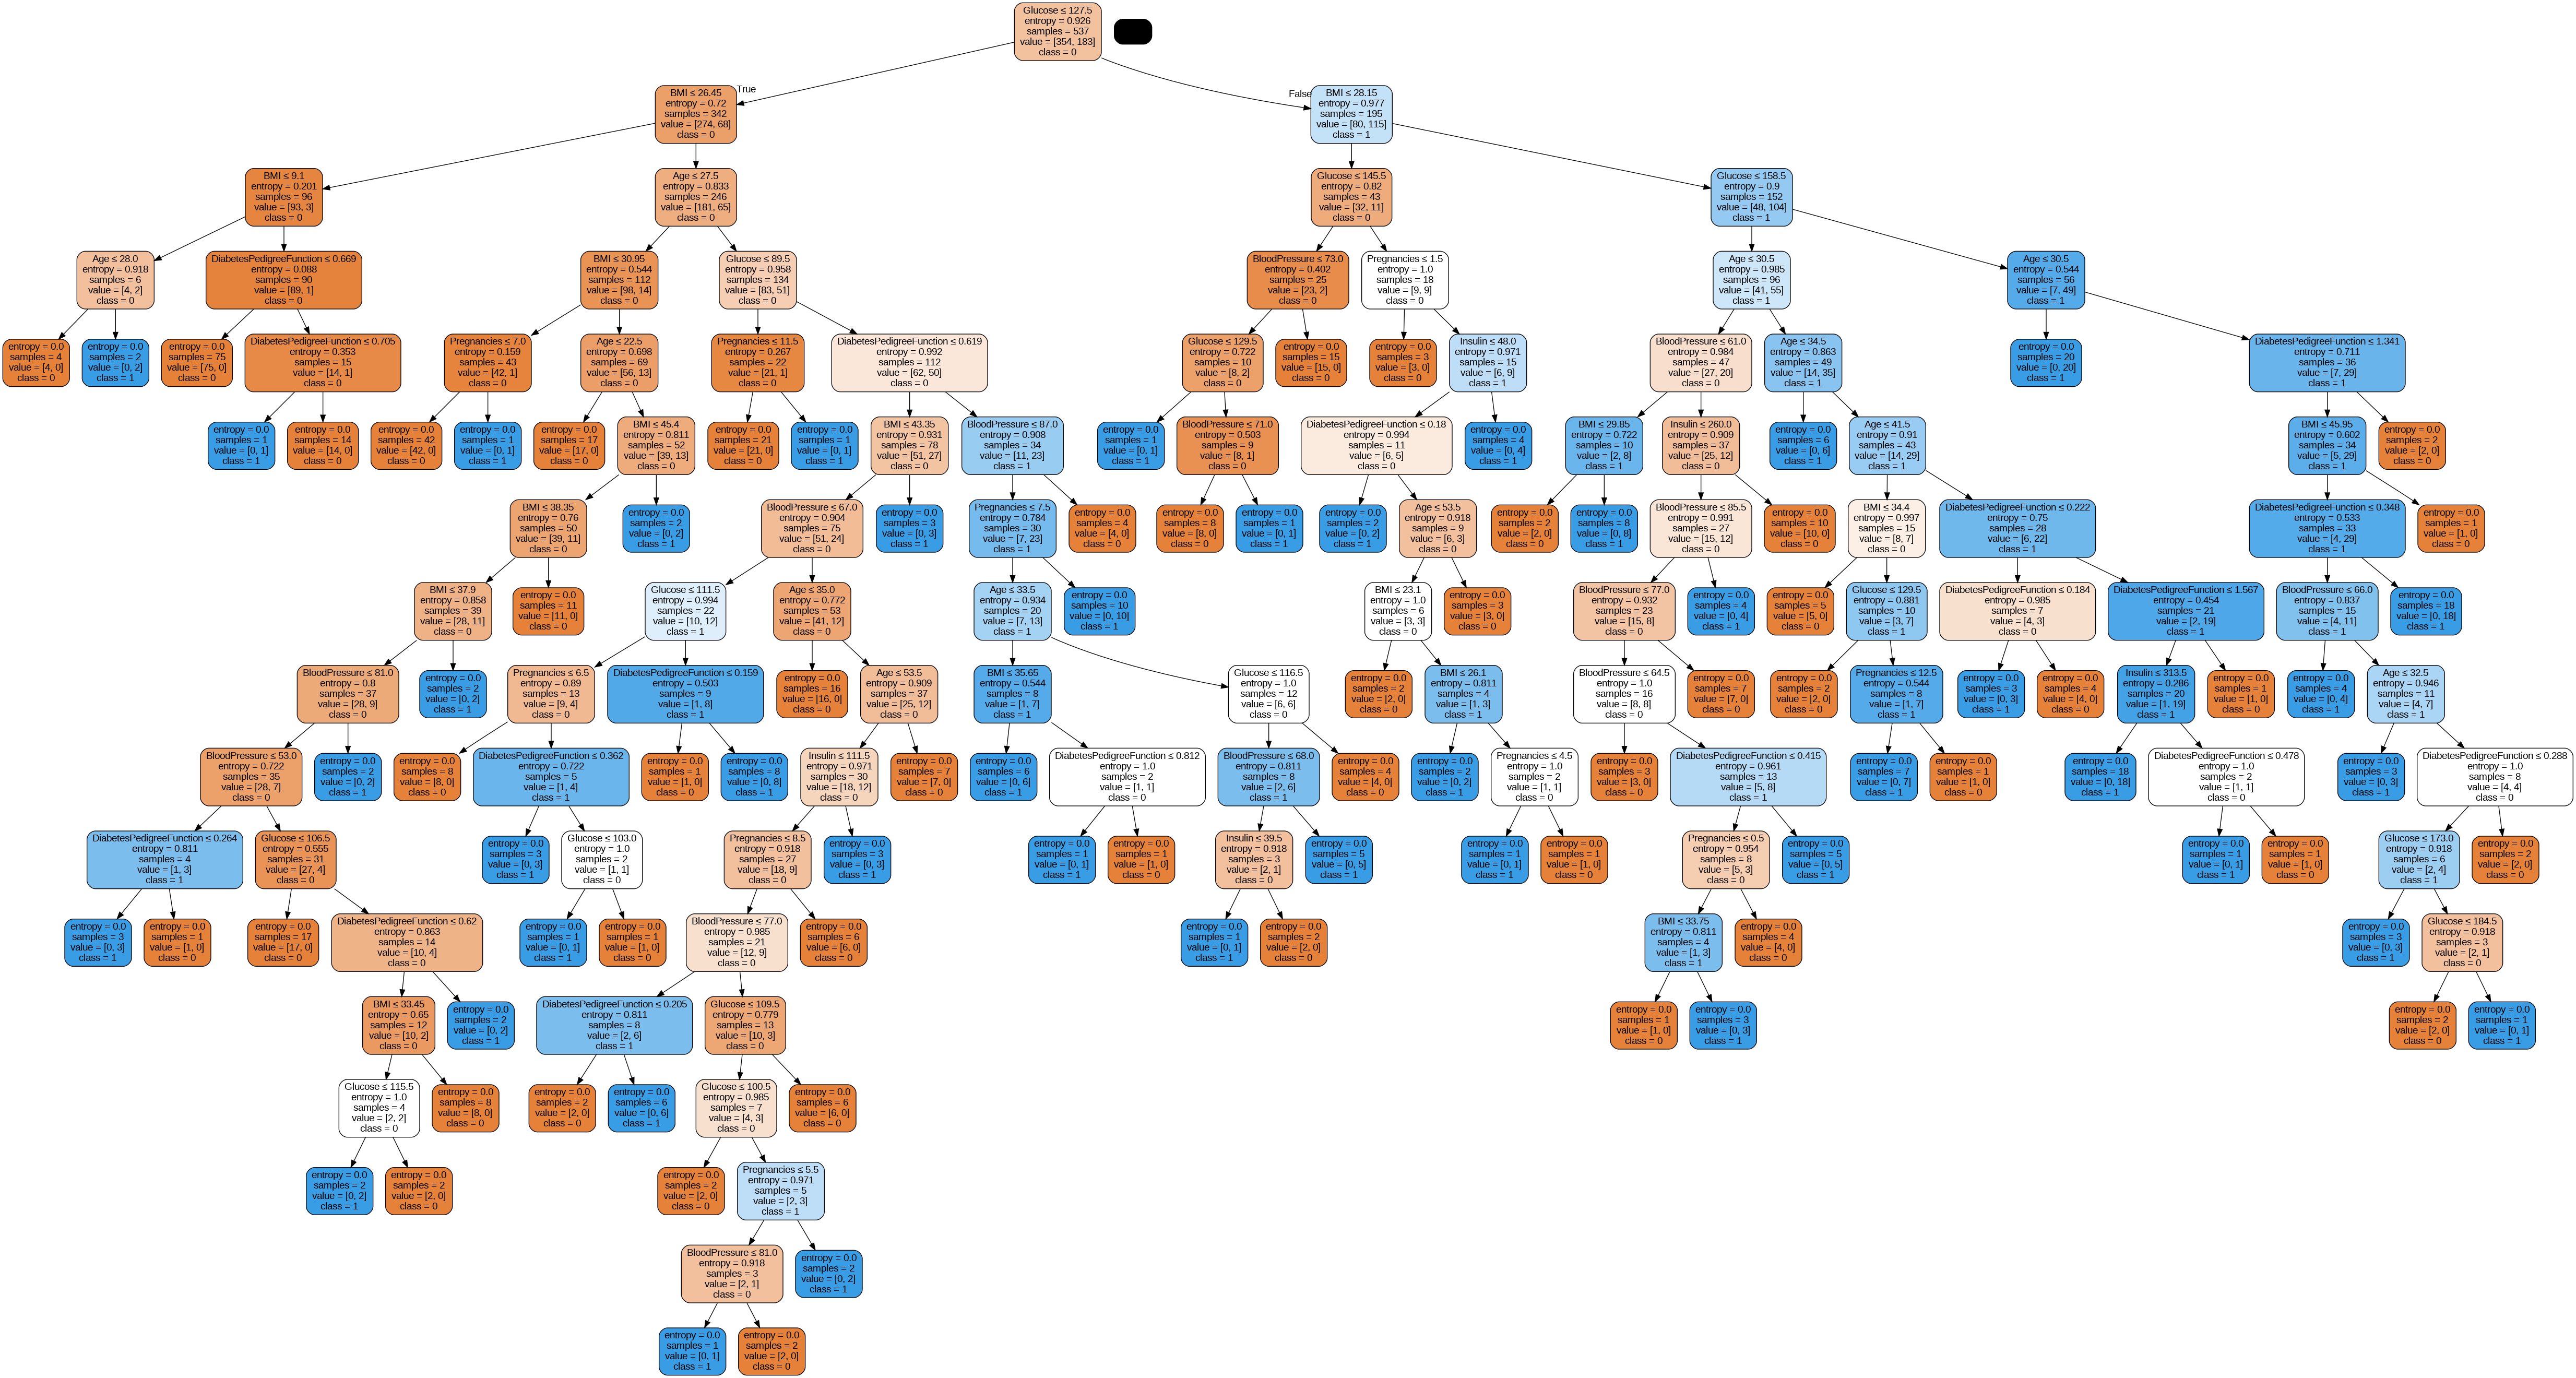

In [23]:
dot_data = export_graphviz(dtc, out_file=None,
                           feature_names=feature_cols,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())